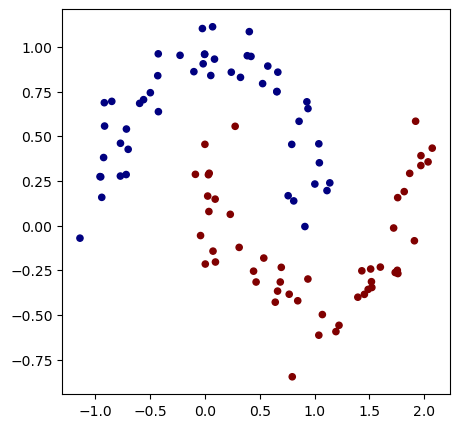

In [63]:
import numpy as np
from weenygrad import *
from sklearn.datasets import make_moons, make_blobs, make_circles
import matplotlib.pyplot as plt

X, labels = make_moons(n_samples=100, noise=0.1)
labels = labels*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=labels, s=20, cmap='jet')

In [64]:
mlp = MLP([2,50,20, 1]) # a simple feed forward network with 2 hidden layers 
epochs = 100
y = [np.array([yi]) for yi in labels]
y = [ADVect(yi) for yi in y]
#print(mlp.params())
for epoch in range(epochs):
    mlp.zero_grad()
    scores = []
    for x in X:
        scores.append(mlp(x))
    raw = [(score @ yi).relu() for score, yi in zip(scores, y)]
    loss = ADVect(np.array([0]))
    for _ in raw:  
        loss = loss + _
    loss.backward()
    accuracy = sum([out.data == 0 for out in raw])/len(X) 
    lr = 1e-3
    for _ in mlp.params():
        _.data -= lr * _.grad
    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}/{epochs}, Loss: {loss.data[0]}, Accuracy: {accuracy}')

Epoch: 10/100, Loss: 4.144576731615265, Accuracy: [0.98]
Epoch: 20/100, Loss: 0, Accuracy: [1.]
Epoch: 30/100, Loss: 0, Accuracy: [1.]
Epoch: 40/100, Loss: 0, Accuracy: [1.]
Epoch: 50/100, Loss: 0, Accuracy: [1.]
Epoch: 60/100, Loss: 0, Accuracy: [1.]
Epoch: 70/100, Loss: 0, Accuracy: [1.]
Epoch: 80/100, Loss: 0, Accuracy: [1.]
Epoch: 90/100, Loss: 0, Accuracy: [1.]
Epoch: 100/100, Loss: 0, Accuracy: [1.]


(-1.8464847807383848, 1.9035152192616152)

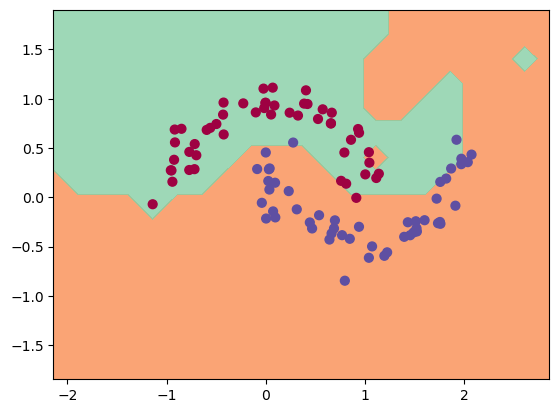

In [65]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
inputs = np.c_[xx.ravel(), yy.ravel()]
scores = list(map(mlp, inputs))
Z = np.array([s.data> 0 for s in scores])
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())